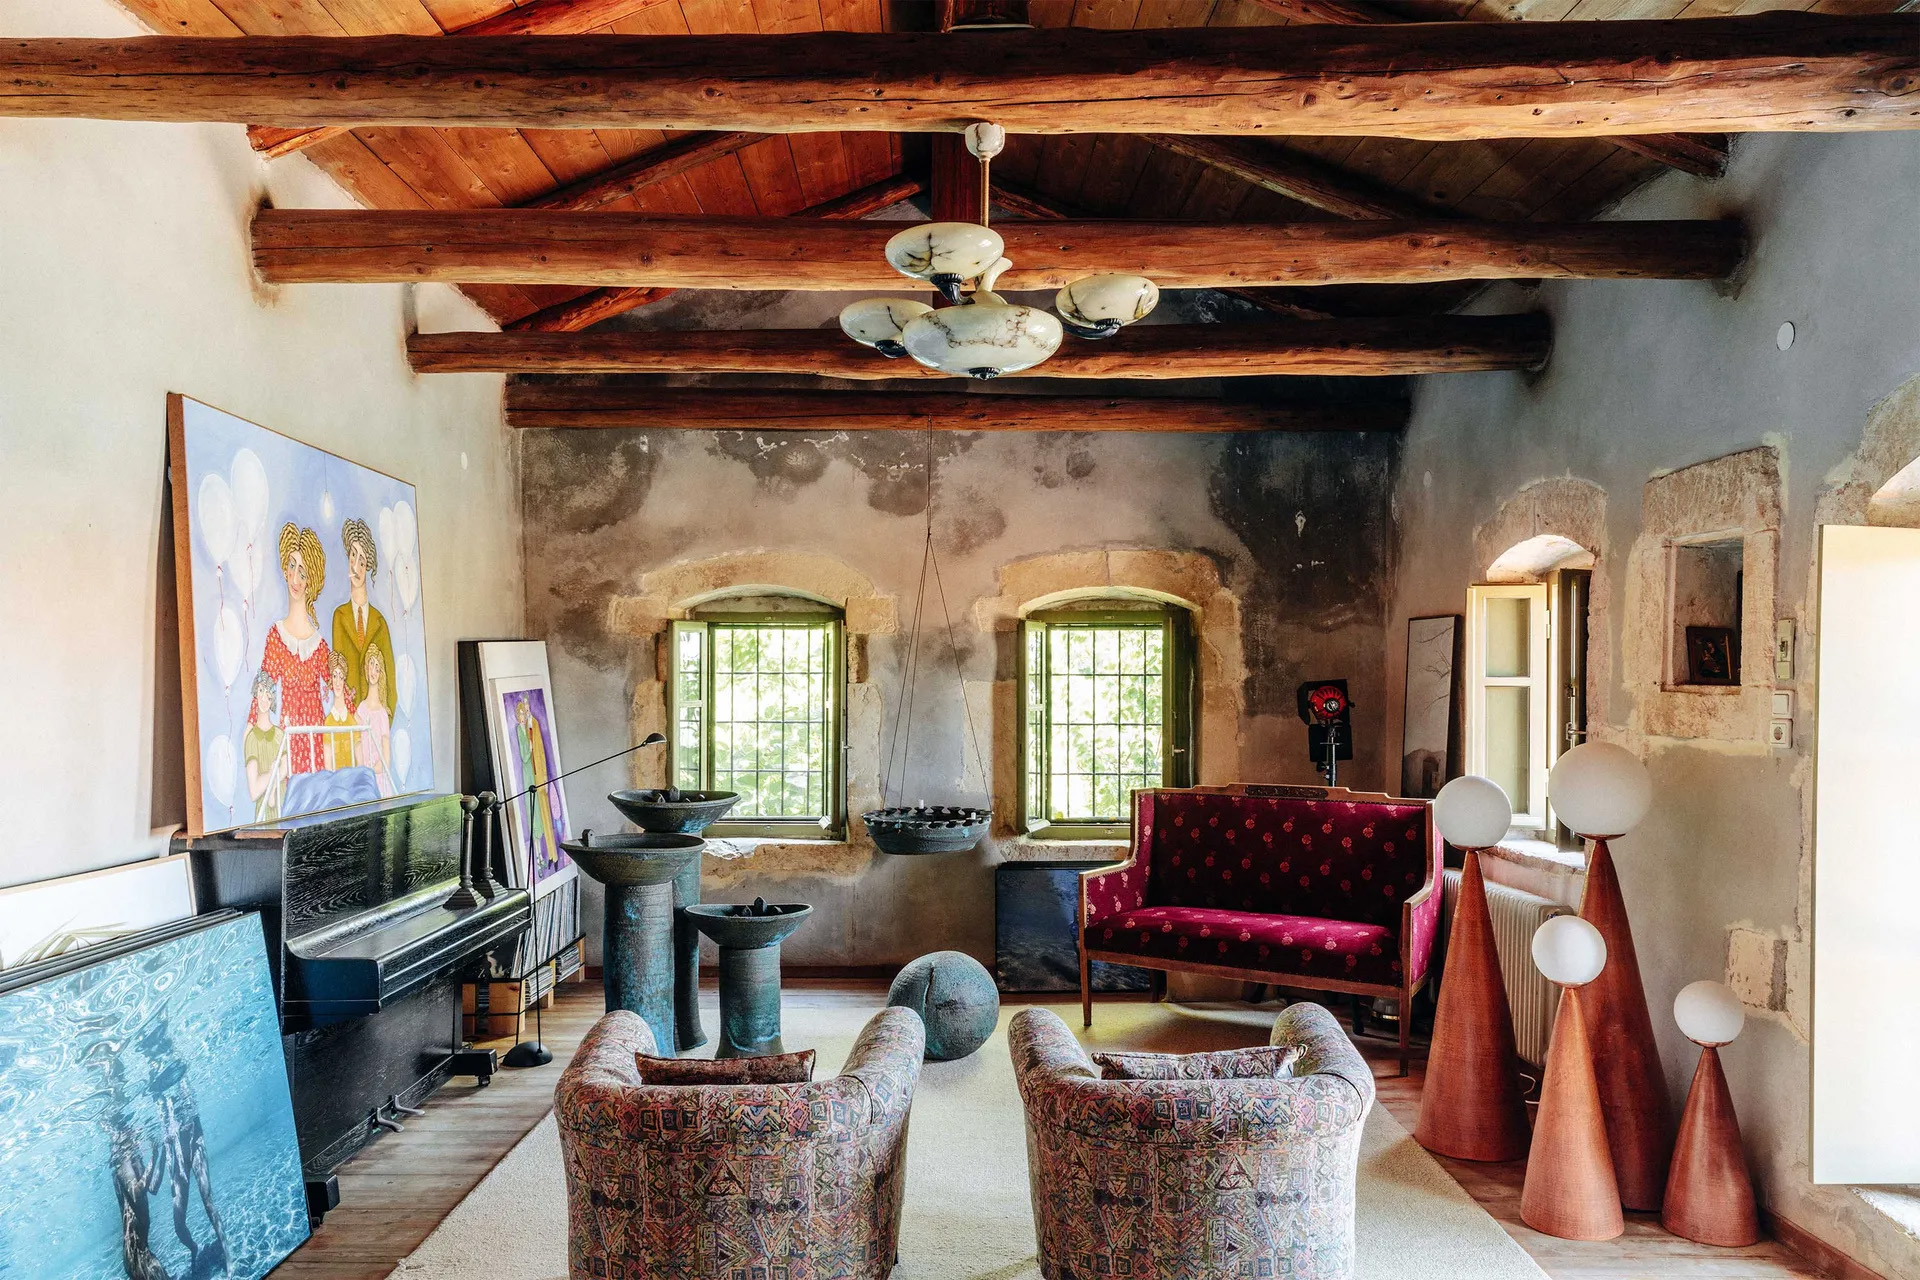

# Create Airbnb

**Author:**
Stephanie Ciaccia

## Overview
Crete is a popular destination in Greece, known for its stunning beaches, rich history, and cuisine. The tourism industry is a major contributor to the island's economy, accounting for a significant portion of its GDP and providing employment opportunities to many local residents. 

Between January and March 2023, traffic numbers from non-European airports have increased by double digits compared to the pre-pandemic period in 2019, indicating a strong recovery in the tourism industry.

## Business Problem
As the 2023 high season approaches, the Greek National Tourism Organisation is collaborating with Crete's Municipal Department of Tourism to discuss the vacation rental market with new airbnb hosts and its anticipated increase in demand.

The Greek National Tourism Organisation aims to present their predictive from a recent analysis of Airbnb listings in Crete to the local housing committee. The objective of the presentation is to identify the essential features associated with high ratings (4 stars and above) on Airbnb listings, assisting new entrants to the Airbnb market by offering insights and recommendations to hosts on how to enhance their listings and ultimately improve guest satisfaction.

## Data Understanding 


In [1781]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import datetime
import zipfile

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
import plotly.express as px
from matplotlib.ticker import StrMethodFormatter

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, plot_roc_curve, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, LogisticRegression

from collections import Counter
from nltk.corpus import stopwords

import pandas as pd
from IPython.display import display

Function for printing long lists

In [1701]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

### Source #1: Airbnb Listings
I pulled the March 2023 Crete Detailed Listings data from insideairbnb.com. This dataset included over 30,000 listings from the last quarter. Inside Airbnb is a mission driven project that provides data and advocacy about Airbnb's impact on residential communities.

http://insideairbnb.com/

The dataset includes over 30,000 entries and 74 rows of features related to the physical airbnb properties and characteristics of the hosts and reviews. The target column, will be created from **review_scores_rating** which is the overall stars the property has.

I will need to create a new column with the target categorical variable after cleaning the data.

In [1702]:
#importing Inside Airbnb data
df = pd.read_csv("data/listings_crete.csv")

In [1704]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23372 entries, 0 to 23371
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23372 non-null  int64  
 1   listing_url                                   23372 non-null  object 
 2   scrape_id                                     23372 non-null  int64  
 3   last_scraped                                  23372 non-null  object 
 4   source                                        23372 non-null  object 
 5   name                                          23370 non-null  object 
 6   description                                   22838 non-null  object 
 7   neighborhood_overview                         13180 non-null  object 
 8   picture_url                                   23372 non-null  object 
 9   host_id                                       23372 non-null 

In [1705]:
df.describe()

id     scrape_id       host_id  host_listings_count  \
count  2.337200e+04  2.337200e+04  2.337200e+04         23372.000000   
mean   1.806035e+17  2.023033e+13  1.820018e+08            41.852687   
std    3.069823e+17  0.000000e+00  1.550618e+08           126.775145   
min    2.796600e+04  2.023033e+13  5.127900e+04             1.000000   
25%    2.130233e+07  2.023033e+13  4.406371e+07             1.000000   
50%    3.971123e+07  2.023033e+13  1.379316e+08             4.000000   
75%    5.592472e+17  2.023033e+13  2.940258e+08            14.000000   
max    8.577857e+17  2.023033e+13  5.074666e+08          2429.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               23372.000000                           0.0  23372.000000   
mean                   69.361287                           NaN     35.351342   
std                   231.480183                           NaN      0.152315   
min                     1.000000                           NaN     34.834420   
25%                     2.000000                           NaN     35.285180   
50%                     4.000000                           NaN     35.363055   
75%                    16.000000                           NaN     35.500255   
max                  5180.000000                           NaN     35.593770   

          longitude  accommodates  bathrooms  ...  review_scores_cleanliness  \
count  23372.000000  23372.000000        0.0  ...               17181.000000   
mean      24.614373      4.790861        NaN  ...                   4.828000   
std        0.679575      2.745473        NaN  ...                   0.340917   
min       23.529640      1.000000        NaN  ...                   0.000000   
25%       24.020455      3.000000        NaN  ...                   4.790000   
50%       24.481700      4.000000        NaN  ...                   4.960000   
75%       25.136183      6.000000        NaN  ...                   5.000000   
max       26.289770     16.000000        NaN  ...                   5.000000   

       review_scores_checkin  review_scores_communication  \
count           17180.000000                 17181.000000   
mean                4.882428                     4.873811   
std                 0.318706                     0.335535   
min                 0.000000                     1.000000   
25%                 4.890000                     4.880000   
50%                 5.000000                     5.000000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count            17180.000000         17180.000000   
mean                 4.754645             4.754873   
std                  0.348654             0.378000   
min                  1.000000             1.000000   
25%                  4.670000             4.670000   
50%                  4.850000             4.860000   
75%                  5.000000             5.000000   
max                  5.000000             5.000000   

       calculated_host_listings_count  \
count                    23372.000000   
mean                        24.317217   
std                         52.083157   
min                          1.000000   
25%                          1.000000   
50%                          4.000000   
75%                         11.000000   
max                        256.000000   

       calculated_host_listings_count_entire_homes  \
count                                 23372.000000   
mean                                     21.752524   
std                                      50.495404   
min                                       0.000000   
25%                                       1.000000   
50%                                       3.000000   
75%                                       9.000000   
max                                     255.000000   

       calculated_host_listings_

## Data Preparation - cleaning

To startoff I looked at null values to begin thinking about replacement methods for null values. I then further inspected the columns with a correlation matrix which columns should be dropped, to avoid overfitting the model.

In [1706]:
#inspecting nulls
df.isna().sum().sort_values(ascending=False).head(30)

bathrooms                       23372
neighbourhood_group_cleansed    23372
calendar_updated                23372
license                         22079
host_neighbourhood              20742
host_about                      11741
neighborhood_overview           10192
neighbourhood                   10192
host_location                    7136
review_scores_value              6192
review_scores_location           6192
review_scores_checkin            6192
review_scores_cleanliness        6191
review_scores_accuracy           6191
review_scores_communication      6191
review_scores_rating             6122
last_review                      6122
first_review                     6122
reviews_per_month                6122
host_response_rate               5201
host_response_time               5201
host_acceptance_rate             2319
bedrooms                         1465
description                       534
beds                              212
bathrooms_text                     42
host_is_supe

In [1707]:
#dropping columns that are mainly null

no_values = ['bathrooms', 'neighbourhood_group_cleansed','calendar_updated','license']

for x in no_values:

    df.drop(columns=[x], inplace=True)


In [1708]:
#dropping columns that are not needed

not_necessary = ['last_scraped','source','scrape_id',
                 'host_location','host_about','host_acceptance_rate', 'host_thumbnail_url',
                 'host_url','host_name','picture_url','last_review', 'first_review', "host_listings_count",
                 "host_total_listings_count",'host_picture_url',
                 'host_identity_verified','host_has_profile_pic',
                 'host_verifications', 'calendar_last_scraped',"host_id","has_availability",
                 "instant_bookable","calculated_host_listings_count", "calculated_host_listings_count_entire_homes",
                 "calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms",
                "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights",
                "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm","minimum_nights", "maximum_nights",
                'beds']

for x in not_necessary:

    df.drop(columns=[x], inplace=True)

In [1709]:
#looking at remaining nulls
df.isna().sum().sort_values(ascending=False).head(10)

host_neighbourhood             20742
neighborhood_overview          10192
neighbourhood                  10192
review_scores_location          6192
review_scores_checkin           6192
review_scores_value             6192
review_scores_communication     6191
review_scores_cleanliness       6191
review_scores_accuracy          6191
reviews_per_month               6122
dtype: int64

In [1710]:
#replacing null values in description with empty strings with n/a as these are important to keep

no_value = ['neighborhood_overview', 'neighbourhood', 'name', 'description', 'host_response_time', 'neighbourhood']

for x in no_value:
    df[x] = df[x].fillna('n/a')

After looking at the airbnb listings on the website, it appears as though null bedrooms are studio apartments or homes that do not have any bedrooms

In [1711]:
#looking at null values of bedroom to determine whether to drop or not
df[df['bedrooms'].isnull()]

id                                      listing_url  \
102                297742              https://www.airbnb.com/rooms/297742   
113                789777              https://www.airbnb.com/rooms/789777   
176                685844              https://www.airbnb.com/rooms/685844   
236                876115              https://www.airbnb.com/rooms/876115   
317               1055530             https://www.airbnb.com/rooms/1055530   
...                   ...                                              ...   
23065  844700621948252197  https://www.airbnb.com/rooms/844700621948252197   
23186  852066997317337107  https://www.airbnb.com/rooms/852066997317337107   
23242  852676361817393851  https://www.airbnb.com/rooms/852676361817393851   
23298  854872123674361782  https://www.airbnb.com/rooms/854872123674361782   
23314  856479422999011796  https://www.airbnb.com/rooms/856479422999011796   

                                                    name  \
102     seaview of Libyan Sea, comfy studio with terrace   
113     Evli 4, spacious apartment, 7 min walk to center   
176                         Studio apartment by the sea.   
236                 Mirabella Studio with Sea View for 2   
317    Beautiful calm rooftop studio with stunning views   
...                                                  ...   
23065                   Irene Luxury Apartments Emmanuel   
23186       Enastron Apartment 6 *View-Pool-Parking-BBQ*   
23242                   BalconyStudio Panorama Meerblick   
23298                   Ροδιά στούντιο με πισίνα και θεα   
23314                                     Veranda stalis   

                                             description  \
102    Casa Rosa Studio has such a great view of the ...   
113    Evli Apartments is fortunately  located in the...   
176    Fully-equipped studio, fully-equipped kitchen ...   
236    ESL 1116395 - Our studios, on the lower floor,...   
317    A beautiful self-contained, fully equipped hol...   
...                                                  ...   
23065  Απολαύστε την χαλάρωση στα νέα διαμερίσματα IR...   
23186  New luxury apartment for 2 to 3 people.  Enast...   
23242  Erlebe in dieser besonderen und familienfreund...   
23298  Χαλαρώστε κάνοντας μια μοναδική και ήρεμη απόδ...   
23314  Enjoy your stay in a cozy & stylish apartment ...   

                                   neighborhood_overview  host_since  \
102    Casa Rosa is situated just above the village o...  2011-12-27   
113    If you are looking for a peaceful stay with sp...  2011-07-26   
176                                                  n/a  2012-09-07   
236    A peaceful location where you can enjoy the mo...  2013-01-03   
317    The studio and neighbouring villa is immersed ...  2013-04-07   
...                                                  ...         ...   
23065                                                n/a  2023-03-11   
23186                                                n/a  2022-07-29   
23242                                                n/a  2015-03-12   
23298                                                n/a  2017-07-09   
23314                                                n/a  2023-03-27   

       host_response_time host_response_rate host_is_superhost  \
102        within an hour               100%                 f   
113        within an hour               100%                 t   
176        within an hour                90%                 f   
236        within an hour               100%                 f   
317        within an hour               100%                 t   
...                   ...                ...               ...   
23065                 n/a                NaN                 f   
23186      within an hour               100%                 f   
23242  within a few hours                89%                 f   
23298      within an hour               100%                 f   
23314                 n/a                NaN         

In [1712]:
#replacing null scores with 0

no_value = ['review_scores_value', 'review_scores_location','review_scores_checkin',
    'review_scores_accuracy','review_scores_communication', 'review_scores_cleanliness',
            'host_response_rate', 'bedrooms', 'reviews_per_month', 'review_scores_rating']

for x in no_value:
    df[x] = df[x].fillna(0)

Dropping the values that are not needed

In [1713]:
#checking for nulls
df.isna().sum().sort_values(ascending=False).head(10)

host_neighbourhood       20742
bathrooms_text              42
host_is_superhost           33
name                         0
description                  0
neighborhood_overview        0
host_since                   0
host_response_time           0
host_response_rate           0
review_scores_value          0
dtype: int64

In [1714]:
#dropping empty superhost rows
df.dropna(subset=['host_is_superhost','bathrooms_text'], inplace=True)

## Inspecting values and cleaning them prior to changing datatype

In [1715]:
df['host_response_time'].value_counts()

within an hour        14027
n/a                    5160
within a few hours     2197
within a day           1631
a few days or more      282
Name: host_response_time, dtype: int64

In [1716]:
df['host_is_superhost'].value_counts()

f    14867
t     8430
Name: host_is_superhost, dtype: int64

In [1717]:
#changing host_is_superhost to binary values

bool_list = ['host_is_superhost']

for x in bool_list:

    df[x].replace(['f', 't'], [0, 1], inplace=True)

In [1718]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23297 entries, 0 to 23371
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           23297 non-null  int64  
 1   listing_url                  23297 non-null  object 
 2   name                         23297 non-null  object 
 3   description                  23297 non-null  object 
 4   neighborhood_overview        23297 non-null  object 
 5   host_since                   23297 non-null  object 
 6   host_response_time           23297 non-null  object 
 7   host_response_rate           23297 non-null  object 
 8   host_is_superhost            23297 non-null  int64  
 9   host_neighbourhood           2625 non-null   object 
 10  neighbourhood                23297 non-null  object 
 11  neighbourhood_cleansed       23297 non-null  object 
 12  latitude                     23297 non-null  float64
 13  longitude       

In [1719]:
#inspecting individual object types
df_object = df.select_dtypes(include="object")

for col in df_object.columns:
    
    print("Column Name: ", col)
    print("Object Type: ", df[col].dtype)
    print("String: ", isinstance(df[col], str))

Column Name:  listing_url
Object Type:  object
String:  False
Column Name:  name
Object Type:  object
String:  False
Column Name:  description
Object Type:  object
String:  False
Column Name:  neighborhood_overview
Object Type:  object
String:  False
Column Name:  host_since
Object Type:  object
String:  False
Column Name:  host_response_time
Object Type:  object
String:  False
Column Name:  host_response_rate
Object Type:  object
String:  False
Column Name:  host_neighbourhood
Object Type:  object
String:  False
Column Name:  neighbourhood
Object Type:  object
String:  False
Column Name:  neighbourhood_cleansed
Object Type:  object
String:  False
Column Name:  property_type
Object Type:  object
String:  False
Column Name:  room_type
Object Type:  object
String:  False
Column Name:  bathrooms_text
Object Type:  object
String:  False
Column Name:  amenities
Object Type:  object
String:  False
Column Name:  price
Object Type:  object
String:  False


In [1720]:
#changing columns to str

remove_char_list = ['bathrooms_text', 'price','host_response_rate']

#loop to remove non numerical characters

for x in remove_char_list:

    df[x].astype(str)
    df[x] = df[x].str.replace(r'[^\d.]+', '')


In [1721]:
#renaming column

df.rename(columns={"bathrooms_text":"bathrooms"}, inplace=True)

In [1722]:
#converting host_response_rate to percentage
df['host_response_rate'] = df['host_response_rate'].astype(float)

df['host_response_rate'] = df['host_response_rate'].div(100).round(2)

df['host_response_rate'] = df['host_response_rate'].fillna(0)

#sanity check of null values
df['host_response_rate'].isna().sum()

0

## Converting data types

In [1723]:
#changing to numeric
df['bathrooms'] = pd.to_numeric(df['bathrooms'])
df['price'] = pd.to_numeric(df['price'])

In [1724]:
#changing datasypes
float_type = ["bathrooms", "price"]
string_type = ["listing_url", "host_response_time", "name", "description","property_type",
               "neighborhood_overview","host_response_time","neighbourhood"]

change_type = [float_type, string_type]

for x in change_type:
    
    df[float_type].astype(float)
    df[string_type].astype(str)

In [1725]:
#resetting index
df.reset_index(drop=True, inplace=True)

# Creating final dataframe for feature selection and modeling

In [1726]:
#making new dataframe from final cleaned df dataframe
feature_df = df

In [1727]:
#renaming column
feature_df.rename(columns={'review_scores_rating':'airbnb_rating'}, inplace=True)

## Manually cleaning amenities column

After inspecting the description, name, and amenities columns and analyzing the most common words present in each of these columns (comprised on long string), I decided to only use the **amenities** column as an indicator of the listings key features. If I had additional time, I would have liked to do a sentiment analysis on the titles and descriptions to see how this impacted scores.

- Cleaning: Since there are over 21000 different amenities and that they play an important role in listings, I cleaned the columns by removing stop words, unnecessary words and phrases, and then used Counter to count the most common features to help analyze which ones should be kept. I tried to limit repetitive features such as soap, linens, hair dryer. I iterated through the list many times until I cleaned up the values.

In [1728]:
#making all values lowercase
feature_df['amenities'] = feature_df['amenities'].apply(str.lower)

#removing all characters that aren't letters
feature_df['amenities'] = feature_df['amenities'].str.replace('[^a-zA-Z\s]', '', regex=True)

In [1729]:
#creating additional list of stop words and unneeded strings to drop
drop_list = ['space</b><br','/>The','/><br','is', 'you',
             'located', 'The', "και", "/><b>The", "<br", "one", "two", "room", "living", "fully", "equipped", "area",
            "It", "με", "double", "also", 'bed', 'beautiful', 'floor', 'enjoy', 'away', 'bathroom', 'bedroom', '&' ,'το',
            'offers', 'dining', '3', 'ideal', 'km', 'large', '/><b>Guest', 'access</b><br', 'minutes', 'bedrooms', 'small',
            'από','city','σε', '/>', 'free', '4', 'Cretan', '-', '2', '3', 'old', 'near', 'home', '1',"allowed",
             'water', 'maker', "hangers","hot", 'u', "street", 'cooking', "premises", "clothing", "silverware", "fire",
             "extinguisher", "first", "aid", "kit", "street", "shower", 'wine', 'glasses', 'storage', 'rack', 'gel', 'free',
            'greets', 'host', 'iron', 'entrance', 'extra', 'outdoor', 'free', 'private', 'table', 'drying', 'available',
             'high','pillows', 'blankets','baking', 'sheet', 'kettle', 'furniture', 'unit', 'pack', 'un', 'playtravel',
             'roomdarkening', 'childrenus', 'chair', 'shades','smoke', 'freezer', 'books', 'shared','body_soap','alarm',
            'system', 'lockbox','soap', 'body', 'linens', 'hair_dryer', 'toaster', 'basics', 'cleaning_products',
            "wardrobe", "upon", "request", "fenced", 'safe', 'type', 'toys', 'drip', 'single', 'level', 'dryer',
            'baby', 'mini','fridge', "stainless", "steel", "carbon", "carbon", "monoxide", "central", "building"
            ,"coutryard", "public","ethernet", "connection", "refrigerator"]

#removing additional words after filtering through results
feature_df['amenities'] = feature_df['amenities'].apply(lambda x: ' '.join([word for word in x.split() if word not in (drop_list)]))

In [1730]:
#updating feature name
feature_df.replace({"amenities": {'long term stays':'long_term_stays', "air conditioning": "air_conditioning",
                                  "beach access":"beach_access", "hair dryer":"hair_dryer", "hair dryer":"hair_dryer",
                                  "shared pool":"shared_pool", "luggage dropoff": "luggage_dropoff",
                                  "private pool":"private_pool","fast wifi":"fast_wifi","sea view":"sea_view",
                                 "hot water":"hot_water","dedicated workspace":"dedicated_workspace",
                                  "private parking":"private_parking","cleaning products":"cleaning_products",
                                  "bbq grill": "bbq_grill","self checkin":"self_checkin", "hdtv":"tv",
                                  "ac split ductless":"ac_split_ductless"}}, regex=True, inplace=True)

stop_words = set(stopwords.words("english"))

# removing stopwords
feature_df['amenities'] = feature_df['amenities'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#making dataframe
top_attributes_amen = pd.DataFrame(Counter(" ".join(feature_df['amenities']).split()).most_common(100))
top_attributes_amen = top_attributes_amen[top_attributes_amen[0] != "Crete"]

#changing column name and datatype
top_attributes_amen.rename(columns={0:"amenity", 1:"amenity_count"}, inplace=True)
top_attributes_amen['amenity'] = top_attributes_amen['amenity'].astype(str)

#dropping repeat rows
top_attributes_amen = top_attributes_amen.drop([18, 27, 28, 36, 37, 38, 39, 40])

#inspecting top values
top_attributes_amen.head(60)

amenity  amenity_count
0               parking          27576
1                  view          27475
2                coffee          26076
3            essentials          23578
4                  wifi          22634
5               kitchen          21815
6                    tv          21335
7                  hair          20800
8      air_conditioning          18520
9                dishes          17847
10                 crib          16520
11              balcony          16512
12                patio          16511
13               washer          16399
14              heating          16070
15              shampoo          15740
16                stove          13754
17                 oven          13739
19      long_term_stays          12664
20             backyard          11592
21      luggage_dropoff           9654
22            bbq_grill           8423
23            microwave           8101
24         beach_access           8001
25    cleaning_products           7956
26  dedicated_workspace           7296
29         self_checkin           6288
30               indoor           5678
31              smoking           5562
32                cable           5554
33             mountain           5334
34                 pets           5218
35             standard           5073
41             utensils           4284
42             electric           4261
43            courtyard           3346
44           beachfront           2913
45           dinnerware           2803
46              netflix           2771
47                 open           2651
48                hours           2651
49               guards           2586
50             material           2583
51              reading           2581
52                 stay           2545
53             cleaning           2517
54          conditioner           2506
55           babysitter           2448
56      recommendations           2448
57             property           2399
58             security           2394
59              cameras           2388
60             portable           2341
61    ac_split_ductless           2260
62               access           2231
63               resort           2205
64                  bay           2181
65          woodburning           2177
66             mosquito           2154
67                  net           2154

In [1731]:
feature_df.isna().sum().sort_values(ascending=False).head(10)

host_neighbourhood        20672
bathrooms                    28
review_scores_value           0
room_type                     0
property_type                 0
longitude                     0
latitude                      0
neighbourhood_cleansed        0
neighbourhood                 0
host_is_superhost             0
dtype: int64

In [1732]:
df.dropna(subset=['bathrooms'], inplace=True)

### List function

In [1733]:
# making function to loop through two lists and replace the values
def replace_list_order(list_1, list_2, dataframe, column):
    for (a, b) in zip(list_1, list_2):
        dataframe = dataframe.replace({column: {a:b}})
    return pd.DataFrame(dataframe[column])

### Translating town names to english

In [1734]:
feature_df['neighbourhood_cleansed'].value_counts()

Χανίων                   5163
Ρεθύμνης                 2795
Χερσονήσου               2055
Αποκορώνου               1655
Ηρακλείου                1628
Αγίου Νικολάου           1343
Κισσάμου                 1328
Πλατανιά                 1218
Μαλεβιζίου               1028
Αγίου Βασιλείου           989
Ιεράπετρας                873
Φαιστού                   834
Μυλοποτάμου               622
Σητείας                   582
Καντάνου - Σέλινου        313
Αρχανών - Αστερουσίων     190
Βιάννου                   157
Σφακίων                   134
Γόρτυνας                  115
Μινώα Πεδιάδας             93
Αμάριου                    68
Οροπεδίου Λασιθίου         41
Γαύδου                     24
Ανωγείων                   21
Name: neighbourhood_cleansed, dtype: int64

I researched the town names and created two lists in order to rename the values.

In [1735]:
#renaming the greek towns

greek_town = ['Χανίων', 'Ρεθύμνης','Χερσονήσου','Αποκορώνου','Ηρακλείου','Αγίου Νικολάου','Κισσάμου',
              'Πλατανιά','Μαλεβιζίου','Αγίου Βασιλείου','Ιεράπετρας','Φαιστού','Μυλοποτάμου', 'Σητείας',
              'Καντάνου - Σέλινου','Αρχανών - Αστερουσίων','Βιάννου',
              'Σφακίων','Γόρτυνας','Μινώα Πεδιάδας','Αμάριου','Οροπεδίου Λασιθίου','Γαύδου','Ανωγείων']
              
              
english_town = ["Chania", "Rethymno", "Hersonissos", "Apokoronas", "Heraklion", "Agios Nikolaos", "Kissamos", 
               "Platanias","Malevizi", "Agios Vasilios", "Ierapetra", "Phaistos", "Mylopotamos", "Siteia",
               "Kantanos-Selino","Archanes-Asterousia", "Viannos", "Sfakia", "Gortyna", "Minoa Pediada", "Amari",
               "Oropedio Lasithiou","Gavdos","Anogeia"]

In [1736]:
feature_df['neighbourhood_cleansed'] = replace_list_order(greek_town, english_town, feature_df, "neighbourhood_cleansed")

In [1737]:
#sanity check
feature_df['neighbourhood_cleansed'].value_counts()

Chania                 5163
Rethymno               2795
Hersonissos            2055
Apokoronas             1655
Heraklion              1628
Agios Nikolaos         1343
Kissamos               1328
Platanias              1218
Malevizi               1028
Agios Vasilios          989
Ierapetra               873
Phaistos                834
Mylopotamos             622
Siteia                  582
Kantanos-Selino         313
Archanes-Asterousia     190
Viannos                 157
Sfakia                  134
Gortyna                 115
Minoa Pediada            93
Amari                    68
Oropedio Lasithiou       41
Gavdos                   24
Anogeia                  21
Name: neighbourhood_cleansed, dtype: int64

## Renaming the final cleaned dataset to **final_feature_df**.

In [1738]:
#making list of top 40 most common words from the amenities column and adding back to new list
vocab_list = top_attributes_amen['amenity'].tolist()
top_vocab_list = vocab_list[0:40]

In [1739]:
#renaming dataframe
final_feature_df = feature_df

In [1740]:
#defining function that makes all letters lowercase and checks to see if keyword is in column
def check_keyword(column, keyword):
    return int(keyword.lower() in column.lower())

# apply the function

for kw in top_vocab_list:
    feature_df[kw] = final_feature_df['amenities'].apply(check_keyword, keyword=kw)

## Renaming property type to six classes

In [1741]:
#making all values lowercase
final_feature_df['property_type'] = final_feature_df['property_type'].apply(str.lower)

#removing all characters that aren't letters
final_feature_df['property_type'] = final_feature_df['property_type'].str.replace('[^a-zA-Z\s]', '', regex=True)

In [1742]:
original_value = ['entire rental unit', 'entire villa', 'entire home', 'entire condo','room in hotel',
            'entire cottage', 'entire serviced apartment', 'private room in rental unit', 'room in aparthotel',
            'room in boutique hotel', 'entire townhouse', 'private room in bed and breakfast', 'entire vacation home',
            'cycladic home', 'private room in serviced apartment', 'entire guest suite', 'entire guesthouse',
            'entire bungalow', 'private room in condo', 'room in serviced apartment', 'private room in resort',
            'entire loft', 'private room in home', 'earthen home', 'tiny home', 'entire place',
            'private room in villa', 'farm stay', 'private room in guesthouse', 'private room',
            'room in bed and breakfast', 'shared room', 'private room in vacation home',
            'private room in guest suite', 'shared room in hostel', 'boat', 'entire cabin',
            'private room in townhouse', 'private room in hostel', 'castle', 'private room in cottage',
            'camperrv', 'private room in loft', 'tent', 'room in hostel', 'room in nature lodge', 'campsite',
            'cave', 'private room in tiny home', 'island', 'entire chalet', 'entire bed and breakfast', 'dome',
            'casa particular', 'private room in tent', 'private room in earthen home', 'private room in farm stay',
            'private room in nature lodge', 'entire homeapt', 'private room in cycladic house', 'barn', 'floor',
            'shared room in vacation home', 'treehouse', 'shared room in rental unit', 'shared room in cycladic house', 'tower',
            'bus', 'shared room in townhouse', 'shared room in guest suite', 'room in rental unit',
            'hut', 'private room in tipi', 'private room in minsu', 'private room in dorm',
            'private room in casa particular', 'private room in camperrv', 'private room in cabin', 'windmill',
                  "private room in special"]


In [1743]:
updated_list = ['entire rental unit', 'entire villa', 'entire home', 'entire condo', 'room in hotel',
                'entire home', 'entire rental unit', 'private room', 'room in hotel', 'room in hotel',
                'entire townhouse', 'private room', 'entire home', 'entire home', 'private room',
                'entire rental unit', 'entire guesthouse', 'entire home', 'private room', 'private room',
                'private room', 'entire home', 'private room', 'entire home', 'entire home', 'entire home',
                'private room', 'entire home', 'private room', 'private room', 'private room', 'shared room',
                'private room', 'private room', 'private room', 'entire home', 'boat', 'private room', 'special',
                'private room', 'private room', 'special', 'private room', 'special', 'private room', 'private room',
                'special', 'special', 'entire villa', 'island', 'private room', 'entire bed and breakfast', 'special',
                'entire home', 'private room', 'private room', 'private room', 'private room', 'private room',
                'entire home', 'shared room', 'shared room', 'special', 'special', 'shared room', 'shared room',
                'private room', 'private room', 'special', 'special', 'private room', 'special', 'private room',
                'shared room', 'private room', 'special', 'private room', 'shared room', 'private room', "private room"]


In [1744]:
final_feature_df['property_type'] = final_feature_df['property_type'].replace(original_value, updated_list)

In [1745]:
final_feature_df['property_type'].value_counts()

entire rental unit          7356
entire home                 5622
entire villa                4990
entire condo                1797
room in hotel               1648
private room                1404
entire townhouse             265
entire guesthouse             90
special                       48
shared room                   28
boat                          13
entire bed and breakfast       4
island                         4
Name: property_type, dtype: int64

In [1746]:
final_feature_df.isna().sum().sort_values(ascending=False)

host_neighbourhood    20645
open                      0
availability_30           0
availability_60           0
availability_90           0
                      ...  
shampoo                   0
stove                     0
oven                      0
long_term_stays           0
id                        0
Length: 76, dtype: int64

In [1747]:
#droppig host_neighbourhood
final_feature_df.drop(columns=['host_neighbourhood'], inplace=True)

## Adding final categorical target column

- Making final categorical target column which makes the ratings binary
- The classes are Above Four Stars(1) and Below Four Stars(0)


In [1748]:
#for loop that appends new categorical value based on
l_is_grte_4stars = []

for rating in final_feature_df.airbnb_rating:
    if rating >= 4:
        l_is_grte_4stars.append(1)
    else:
        l_is_grte_4stars.append(0)
        
final_feature_df['airbnb_rating'] = l_is_grte_4stars

In [1749]:
#classification distribution
#the target class has higher 
final_feature_df.airbnb_rating.value_counts(normalize=True)

1    0.723409
0    0.276591
Name: airbnb_rating, dtype: float64

# One hot encoding categorical features

In [1750]:
#dropping final columns before one hot encoding
final_feature_df.drop(columns=["name","neighbourhood","id","listing_url", "description","neighborhood_overview",'review_scores_checkin',
                                 'review_scores_communication','review_scores_location','review_scores_value',
                               "availability_30","availability_60","availability_90",
                               "availability_365","host_response_time","review_scores_accuracy","host_since",
                               "property_type","amenities","number_of_reviews","review_scores_cleanliness",
                               "number_of_reviews_ltm","number_of_reviews_l30d","reviews_per_month"], inplace=True)

In [1751]:
categorical_features_names = ['neighbourhood_cleansed', "room_type"]

enc = OneHotEncoder()


enc_data = pd.DataFrame(enc.fit_transform(
                final_feature_df[categorical_features_names]).toarray())
      
enc_cols = enc.get_feature_names()

mapped_cols = []

for col in enc_cols:
    if 'x0' in col:
        mapped_col = col.replace('x0', categorical_features_names[0])
    if 'x1' in col:
        mapped_col = col.replace('x1',categorical_features_names[1])
    
    mapped_cols.append(mapped_col)

enc_data.columns = mapped_cols

# Merging OHC with final dataframe`
model_dt_df = pd.merge(final_feature_df, enc_data, left_index=True, right_index=True)

In [1752]:
model_dt_df.isna().sum().sort_values(ascending=False)

room_type_Shared room                         0
oven                                          0
crib                                          0
balcony                                       0
patio                                         0
                                             ..
neighbourhood_cleansed_Amari                  0
neighbourhood_cleansed_Anogeia                0
neighbourhood_cleansed_Apokoronas             0
neighbourhood_cleansed_Archanes-Asterousia    0
host_response_rate                            0
Length: 79, dtype: int64

# Feature Analysis

In [1753]:
model_dt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23241 entries, 0 to 23268
Data columns (total 79 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   host_response_rate                          23241 non-null  float64
 1   host_is_superhost                           23241 non-null  int64  
 2   neighbourhood_cleansed                      23241 non-null  object 
 3   latitude                                    23241 non-null  float64
 4   longitude                                   23241 non-null  float64
 5   room_type                                   23241 non-null  object 
 6   accommodates                                23241 non-null  int64  
 7   bathrooms                                   23241 non-null  float64
 8   bedrooms                                    23241 non-null  float64
 9   price                                       23241 non-null  float64
 10  airbnb_rat

In [1754]:
model_dt_df["neighbourhood_cleansed_Chania"].value_counts()

0.0    18086
1.0     5155
Name: neighbourhood_cleansed_Chania, dtype: int64

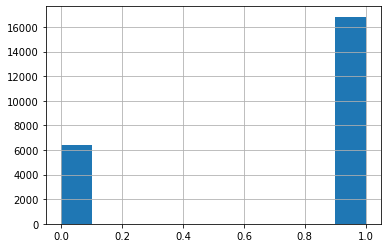

In [1755]:
model_dt_df['airbnb_rating'].hist();

After looking at the correlation matrid

In [1756]:
#looking at correlation matrix of airbnb_rating
corr_matrix = pd.DataFrame(df.corr(method='pearson'))
print_full(corr_matrix['airbnb_rating'].sort_values(ascending=False))

airbnb_rating          1.000000
dishes                 0.285936
essentials             0.277496
host_is_superhost      0.247794
stove                  0.217282
coffee                 0.216654
balcony                0.209098
patio                  0.209098
hair                   0.194097
long_term_stays        0.187819
host_response_rate     0.182644
oven                   0.178820
shampoo                0.178123
luggage_dropoff        0.143144
crib                   0.129551
self_checkin           0.129209
parking                0.126246
kitchen                0.115485
netflix                0.103653
backyard               0.099190
heating                0.097294
dinnerware             0.087974
view                   0.087159
wifi                   0.086316
cleaning_products      0.085884
beachfront             0.082333
beach_access           0.080063
washer                 0.079578
cable                  0.074904
standard               0.071815
electric               0.063816
microwav

In [1757]:
#inspecting dishes
print_full(corr_matrix['dishes'].sort_values(ascending=False).head(20))

dishes               1.000000
coffee               0.680140
balcony              0.601212
patio                0.601212
stove                0.592877
oven                 0.552285
long_term_stays      0.438697
essentials           0.392001
kitchen              0.377693
cleaning_products    0.367567
backyard             0.363976
microwave            0.316156
hair                 0.312291
view                 0.297714
crib                 0.291038
luggage_dropoff      0.290158
airbnb_rating        0.285936
washer               0.278739
utensils             0.257481
electric             0.256812
Name: dishes, dtype: float64


In [1758]:
print_full(corr_matrix['price'].sort_values(ascending=False).head(30))

price                  1.000000
bathrooms              0.076605
air_conditioning       0.058133
bedrooms               0.041585
accommodates           0.037261
latitude               0.023681
longitude              0.018109
host_is_superhost      0.017727
dedicated_workspace    0.013593
tv                     0.008984
open                   0.007044
crib                   0.004111
standard               0.003268
cable                  0.001176
beachfront            -0.000134
host_response_rate    -0.003192
dinnerware            -0.012637
wifi                  -0.017924
netflix               -0.018971
utensils              -0.022178
microwave             -0.022298
shampoo               -0.023170
indoor                -0.023979
bbq_grill             -0.029070
luggage_dropoff       -0.032572
beach_access          -0.034510
hair                  -0.036999
backyard              -0.040006
electric              -0.042460
self_checkin          -0.043904
Name: price, dtype: float64


In [1759]:
model_dt_df["airbnb_rating"].replace([1, 0], ["Above 4 Stars", "Below 4 Stars"], inplace=True)

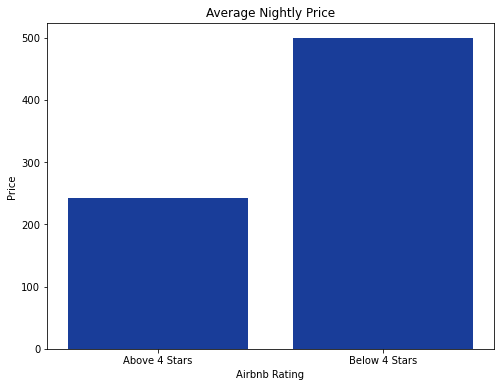

In [1760]:
# group the data by the "is_grte_4stars" column and calculate the mean price for each group

#making airbnb_rating a string

grouped = model_dt_df.groupby("airbnb_rating")["price"].mean()

fig = plt.figure(figsize = (8, 6))

# create a bar plot
plt.bar(grouped.index, grouped.values, color="#193d99")

# set the x-axis label
plt.xlabel("Airbnb Rating")

# set the y-axis label
plt.ylabel("Price")

#adding title
plt.title("Average Nightly Price")

# show the plot
plt.show()

In [1761]:
model_dt_df["airbnb_rating"]

0        Above 4 Stars
1        Above 4 Stars
2        Above 4 Stars
3        Above 4 Stars
4        Above 4 Stars
             ...      
23264    Below 4 Stars
23265    Below 4 Stars
23266    Below 4 Stars
23267    Below 4 Stars
23268    Below 4 Stars
Name: airbnb_rating, Length: 23241, dtype: object

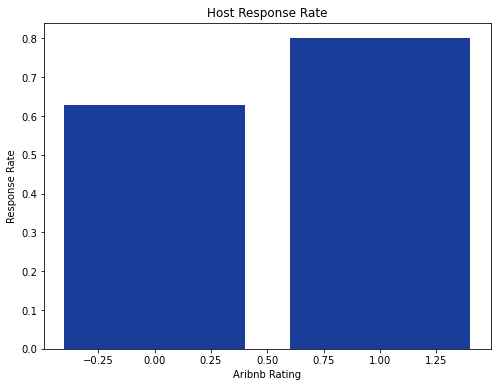

In [1901]:
# group the data by the and take mean

grouped = model_dt_df.groupby("airbnb_rating")["host_response_rate"].mean()

fig = plt.figure(figsize = (8, 6))

# create a bar plot
plt.bar(grouped.index, grouped.values, color="#193d99")

# set the x-axis label
plt.xlabel("Aribnb Rating")

# set the y-axis label
plt.ylabel("Response Rate")

#adding title
plt.title("Host Response Rate")

# show the plot
plt.show()

# CV class

In [1763]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        #self.df_cv = pd.DataFrame(columns=['Model', 'CV Precision Mean'])
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=15):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds, scoring="precision")
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

    def cross_val_dataframe(self, df_cv): 
          
        new_row = {'Model': self.name , 'CV Precision Mean': self.cv_mean}
        #dataframe_cv = dataframe_cv.append(new_row, ignore_index=True)
        df_cv.loc[len(df_cv)] = new_row

        #sanity check
        return df_cv    
    
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} precision
        ''')
        print(cv_summary)
        
        
    def print_df_results(self):
        df_cv_score = pd.DataFrame(zip(self.cv_results, self.cv_mean),
                              columns=['cv_precision_score', 'mean_cv_precision_score'], index=metrics)
        return df

    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Precision Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )   
    
        return ax

# Dummy Model - Base

In [1764]:
model_dt_df["airbnb_rating"].replace(["Above 4 Stars", "Below 4 Stars"],[1, 0], inplace=True)

In [1765]:
# defining features
X = model_dt_df.drop(categorical_features_names + ['airbnb_rating'], axis=1)
y = model_dt_df.airbnb_rating

# Split for test & training  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27)

In [1766]:
#sanity check
(X_test).shape

(6973, 76)

In [1767]:
dummy_model = DummyClassifier(strategy="most_frequent")

dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [1768]:
#checking distribution of target variables
y_test.value_counts(normalize=True)

1    0.7258
0    0.2742
Name: airbnb_rating, dtype: float64

The dummy model score gives us a cross_val_score of 72%. This means that the accuracy of the model is 72% if we always guess the majority class

In [1769]:
# Checking cross_val_score
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=3, scoring="precision" )
cv_results.mean()

0.7235677382599658

In [1770]:
model_results.print_cv_summary()

CV Results for `Decision Tree #1` model:
            0.80802 ± 0.00807 precision
        


CV Results for `base_model` model:
            0.72357 ± 0.00032 precision
        


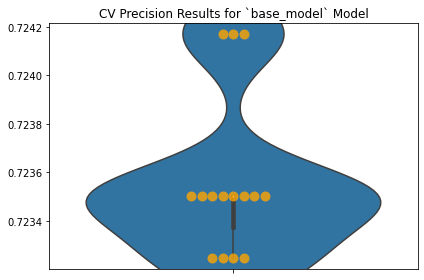

In [1771]:
#cross validation of scores
model_results = ModelWithCV(model = dummy_model , model_name='base_model',X=X_train, y=y_train)

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();

# Print CV results
model_results.print_cv_summary()

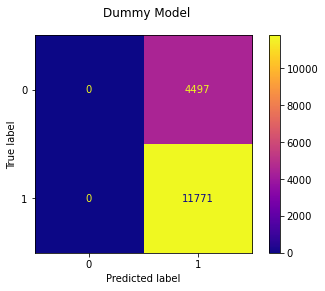

In [1772]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

In [1773]:
# just the numbers (this should work even with older scikit-learn)
confusion_matrix(y_train, dummy_model.predict(X_train))

array([[    0,  4497],
       [    0, 11771]])

Adding values to dataframe with CV score for all models

In [1806]:
#making new dataframe
df_cv_2 = pd.DataFrame(columns=['Model', 'CV Precision Mean'])

#finding results
model_results = ModelWithCV(model = dummy_model , model_name='Base Model',X=X_train, y=y_train)
model_results.cross_val_dataframe(df_cv_2)

Model  CV Precision Mean
0  Base Model           0.723568

# Modeling & Performance Metric Overview

To look at the overall performance of all models, I will first be looking at the cross validation scores and precision score. **Precision** will be my main metric to determine the final model's performance.

- The cross validation score will determine the general performance of the decision tree model and help detect overfitting.

- The precision score is the main metric I will be using, as it is important to reduce false positives while predicting ratings. This is essential as we do not want to misclassify low star properties as having high starts, as it will give airbnb hosts false expectations of an increase in bookings and reviews.


When I intiially ran the base model, I included features that were too highly correlated with the target variable, so I dropped those in the data cleaning section. Those features included:

- number_of_reviews
- review_scores_cleanliness
- review_scores_rating

I originally wanted to include these in the model, but after further looking into the business problem I determined that it was best to remove these values as it did not provide insight into what to do in order to obtain reviews. So though number_of_reviews is the highest correlated feature, it was removed from the model.

# #1 Decision Tree

In [1775]:
# #fitting model
dt_model_1 = DecisionTreeClassifier(random_state=42)

# #fitting model
dt_model_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [1776]:
#sanity check
(X_train).shape

(16268, 76)

## Base Model Analysis

The base model has a cross validation score of 81%, which is an improvement from the dummy model. The model does not appear to be overfit.

CV Results for `dt_tree` model:
            0.80802 ± 0.00807 precision
        


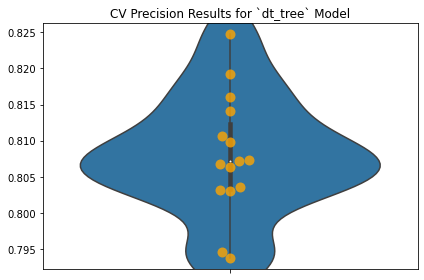

In [1777]:
#cross validation of scores
model_results = ModelWithCV(model = dt_model_1, model_name='dt_tree',X=X_train, y=y_train)

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();

# Print CV results
model_results.print_cv_summary()

In [1807]:
model_results = ModelWithCV(model = dt_model_1 , model_name='Decision Tree #1',X=X_train, y=y_train)
model_results.cross_val_dataframe(df_cv_2)

Model  CV Precision Mean
0        Base Model           0.723568
1  Decision Tree #1           0.808020

The base model has precision score of 72%. This appears to be good, however due to the class imbalance of the target variable, the model does not perform well on predicting ratings below 4 starts. This means I will need to adjust the weight of the model to fix this distribution.

### Feature Importance Function

To analyze the feature importance of the variables, I have defined a function to plot the top 15 features and display the top 20 features in a DataFrame to further analyze additional features.

In [1693]:
#deifning function to plot feature importance
def plot_top_15_features(model, x_train_var, feature_vals):
    
    tree_features = (model.feature_importances_)
    tree_features = pd.DataFrame(tree_features)
    
    #renaming column
    tree_features["Feature"] = x_train_var.columns.values
    
    #sorting the top 15 most important features
    top_15_features = tree_features.sort_values(0,ascending=False).head(feature_vals)
    
    #renaming feature column
    top_15_features.rename(columns={0:"Importance"}, inplace=True)

    #using plotly to plot the top features
    fig = px.bar(top_15_features, x="Feature", y="Importance", title = "Top Features")
    fig.update_layout(title_text='Feature Importance', title_x=0.5)
    fig.update_traces(marker_color = "#193d99")
    fig.show()
    
    #displaying the top 20 features for further analysis
    display(pd.DataFrame(tree_features.sort_values(0,ascending=False)).head(20))

### #1 Base Model - Decision Tree Feature Importance

In [1782]:
plot_top_15_features(dt_model_1, X_train, 15)

0                        Feature
7   0.128927                          price
3   0.117993                      longitude
2   0.097220                       latitude
17  0.077937                         dishes
0   0.036257             host_response_rate
4   0.033323                   accommodates
5   0.028561                      bathrooms
1   0.028491              host_is_superhost
11  0.027946                     essentials
6   0.021250                       bedrooms
31  0.013334                   beach_access
22  0.013177                        heating
33  0.012310            dedicated_workspace
36  0.010815                        smoking
39  0.010432                           pets
18  0.010381                           crib
54  0.010253  neighbourhood_cleansed_Chania
27  0.010096                       backyard
9   0.009685                           view
44  0.009244                     beachfront

# Model #2  - Decision Tree w/ Hyperparameter Adjustments

In [1783]:
#instantiating model
dt_model_2 = DecisionTreeClassifier(criterion='entropy', random_state=42, min_samples_leaf=4, max_depth=10,
                                    class_weight="balanced")

#fitting model
dt_model_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=4, random_state=42)

CV Results for `Decision Tree #2` model:
            0.84999 ± 0.01108 precision
        


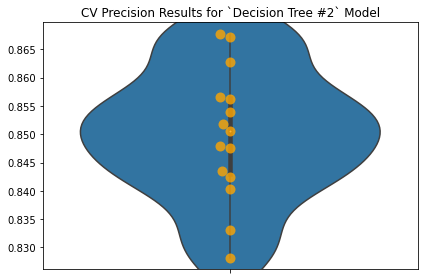

In [1784]:
#cross validation of scores
model_results_2 = ModelWithCV(model= dt_model_2, model_name='Decision Tree #2',X=X_train, y=y_train)

# Plot CV results
fig, ax = plt.subplots()
ax = model_results_2.plot_cv(ax)
plt.tight_layout();

# Print CV results
model_results_2.print_cv_summary()

In [1808]:
model_results = ModelWithCV(model = dt_model_2 , model_name='Decision Tree #2',X=X_train, y=y_train)
model_results.cross_val_dataframe(df_cv_2)

Model  CV Precision Mean
0        Base Model           0.723568
1  Decision Tree #1           0.808020
2  Decision Tree #2           0.849986

In [1788]:
plot_top_15_features(dt_model_2, X_train, 15)

0              Feature
7   0.186130                price
17  0.178434               dishes
1   0.095400    host_is_superhost
2   0.073470             latitude
3   0.066203            longitude
0   0.058426   host_response_rate
11  0.046701           essentials
5   0.020470            bathrooms
42  0.015807             electric
4   0.014780         accommodates
6   0.011990             bedrooms
45  0.010519           dinnerware
44  0.009723           beachfront
32  0.009407    cleaning_products
39  0.009084                 pets
33  0.008986  dedicated_workspace
47  0.008805                 open
36  0.008734              smoking
22  0.008620              heating
23  0.008530              shampoo

# Model #3  - Random Forest

In [1789]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_features='sqrt', max_samples=0.3, random_state=1,class_weight="balanced")
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       max_samples=0.3, random_state=1)

In [1790]:
forest.score(X_train, y_train)

0.8976518318170642

CV Results for `Random Forest #2` model:
            0.79978 ± 0.00610 precision
        


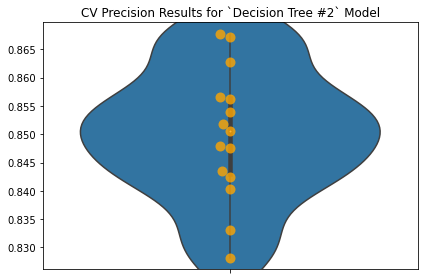

In [1791]:
#cross validation of scores
forest_model_results = ModelWithCV(model= forest, model_name='Random Forest #2',X=X_train, y=y_train)

# Plot CV results
fig, ax = plt.subplots()
ax = model_results_2.plot_cv(ax)
plt.tight_layout();

# Print CV results
forest_model_results.print_cv_summary()

In [1809]:
model_results = ModelWithCV(model = forest , model_name='Random Forest',X=X_train, y=y_train)
model_results.cross_val_dataframe(df_cv_2)

Model  CV Precision Mean
0        Base Model           0.723568
1  Decision Tree #1           0.808020
2  Decision Tree #2           0.849986
3     Random Forest           0.799775

In [1810]:
plot_top_15_features(forest, X_train, 15)

0              Feature
7   0.098850                price
3   0.079350            longitude
2   0.075440             latitude
1   0.043893    host_is_superhost
4   0.040600         accommodates
0   0.040114   host_response_rate
5   0.030009            bathrooms
6   0.027591             bedrooms
17  0.025228               dishes
11  0.020873           essentials
24  0.015841                stove
23  0.015293              shampoo
26  0.013742      long_term_stays
10  0.013541               coffee
28  0.013467      luggage_dropoff
22  0.013456              heating
33  0.013409  dedicated_workspace
18  0.013393                 crib
36  0.012802              smoking
34  0.012635         self_checkin

## Decision Tree - Grid Search

In this grid search, I will be adjusting hyperparameters to fix the class imbalance and determine the best depth and sample leafs for the decision tree.

Due to the large class imbalance, I have parced through a variety of weights. urrently, their is a large class imbalance, favoriing Above 4 Stars.

In [935]:
grid = {
    'criterion':['entropy', 'gini'],
    'max_depth': [5, 6, 7, 10, 12],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': ['balanced']
}

gs = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, cv=5, verbose=2, scoring="precision")

gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, cr

[CV]  class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=1, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, min_samples_leaf=3, total=   0.1s
[CV] class_weight=b

[CV]  class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=6, min_sa

[CV]  class_weight=balanced, criterion=gini, max_depth=12, min_samples_leaf=5, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=12, min_samples_leaf=5 
[CV]  class_weight=balanced, criterion=gini, max_depth=12, min_samples_leaf=5, total=   0.1s
[CV] class_weight=balanced, criterion=gini, max_depth=12, min_samples_leaf=5 
[CV]  class_weight=balanced, criterion=gini, max_depth=12, min_samples_leaf=5, total=   0.1s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   16.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 6, 7, 10, 12],
                         'min_samples_leaf': [1, 3, 5]},
             scoring='precision', verbose=2)

In [939]:
# Best Hyperparameters
dt_gs = gs.best_params_
dt_gs

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 3}

In [940]:
# Best CV score mean
dt_gs_best_cv = gs.best_score_
dt_gs_best_cv

0.861690134463528

In [941]:
# We can find the best estimator
dt_best_model = gs.best_estimator_
dt_best_model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=3)

In [1816]:
#saving final decision tree best model params
dt_best_model = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=3)

#fitting model
dt_best_model.fit(X_train, y_train)

dt_best_model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=3)

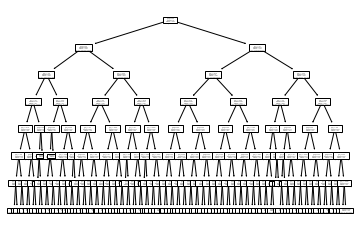

In [953]:
#plotting tree
plot_tree(dt_best_model);

CV Results for `final_model` model:
            0.85419 ± 0.01192 precision
        


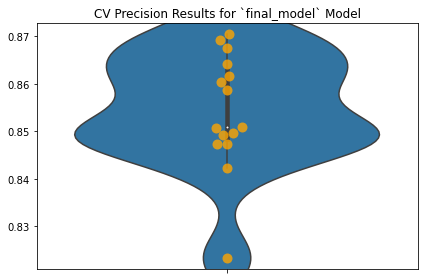

In [1817]:
final_model_results = ModelWithCV(
                        model=dt_best_model,
                        model_name='final_model',
                        X=X_train, 
                        y=y_train)

# Plot CV results
fig, ax = plt.subplots()
ax = final_model_results.plot_cv(ax)
plt.tight_layout();


# Print CV results
final_model_results.print_cv_summary()

In [1818]:
model_results = ModelWithCV(model = dt_best_model, model_name='Decision Tree #3 - Best Model',X=X_train, y=y_train)
model_results.cross_val_dataframe(df_cv_2)

Model  CV Precision Mean
0                     Base Model           0.723568
1               Decision Tree #1           0.808020
2               Decision Tree #2           0.849986
3                  Random Forest           0.799775
4  Decision Tree #3 - Best Model           0.854394

# Random Forest - Grid Search

In [947]:
grid = {
    'max_features':['sqrt', 'gini', "entropy"],
    'max_samples': [.1 , .5, .7],
    'class_weight': ['balanced','balanced_subsample']
}

gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=5, verbose=2)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.1 .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.1 .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.1 .......
[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.1 .......
[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.1 .......
[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.5, total=   1.2s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.5, total=   1.2s
[CV] class_weight=balanced, max_features=sqrt, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=sqrt, max_samples=0.5, total=   1.3s
[CV] class_weight=bal

/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced, max_features=gini, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.5 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.5 .......


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.7 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.7 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.7 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.7 .......
[CV]  class_weight=balanced, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=gini, max_samples=0.7 .......


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.1 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.1 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.1 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.1 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.1 ....


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.5 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.5 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.5 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.5 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.5 ....


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.7 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.7 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.7 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.7 ....
[CV]  class_weight=balanced, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced, max_features=entropy, max_samples=0.7 ....


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1, total=   0.6s
[CV] class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=sqrt, max_samples=0.1, total=   0.5s
[CV] class_weight=balanced_subsample, max_features=sqrt, max_samples=0.5 
[CV]  class_weight=balanced_s

/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.5 


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=gini, max_samples=0.7 


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced_subsample, max_features=gini, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.1 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.1 


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.1, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.5 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.5 


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.5, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.7 
[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.7, total=   0.0s
[CV] class_weight=balanced_subsample, max_features=entropy, max_samples=0.7 


/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(t

[CV]  class_weight=balanced_subsample, max_features=entropy, max_samples=0.7, total=   0.0s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_features': ['sqrt', 'gini', 'entropy'],
                         'max_samples': [0.1, 0.5, 0.7]},
             verbose=2)

In [948]:
# Best Hyperparameters
rf_gs = gs.best_params_
rf_gs

{'class_weight': 'balanced_subsample',
 'max_features': 'sqrt',
 'max_samples': 0.7}

In [949]:
# Best CV score mean
rf_gs_best_cv = gs.best_score_
rf_gs_best_cv

0.797655663915979

In [950]:
# We can find the best estimator
rf_best_model = gs.best_estimator_
rf_best_model

RandomForestClassifier(class_weight='balanced_subsample', max_features='sqrt',
                       max_samples=0.7)

In [1819]:
#saving final random forest best model params
rf_best_model = RandomForestClassifier(class_weight='balanced_subsample', max_features='sqrt',
                       max_samples=0.7)

#fitting
rf_best_model.fit(X_train, y_train)

rf_best_model

RandomForestClassifier(class_weight='balanced_subsample', max_features='sqrt',
                       max_samples=0.7)

CV Results for `rf_final_model` model:
            0.80651 ± 0.00645 precision
        


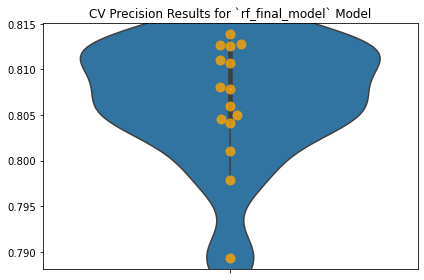

In [1821]:
final_model_results = ModelWithCV(
                        model=rf_best_model,
                        model_name='rf_final_model',
                        X=X_train, 
                        y=y_train)

# Plot CV results
fig, ax = plt.subplots()
ax = final_model_results.plot_cv(ax)
plt.tight_layout();

# Print CV results
final_model_results.print_cv_summary()

In [1822]:
model_results = ModelWithCV(model = rf_best_model, model_name='Random Forest #2',X=X_train, y=y_train)
model_results.cross_val_dataframe(df_cv_2)

Model  CV Precision Mean
0                     Base Model           0.723568
1               Decision Tree #1           0.808020
2               Decision Tree #2           0.849986
3                  Random Forest           0.799775
4  Decision Tree #3 - Best Model           0.854394
5               Random Forest #2           0.806163

# Final Model Selection - Decision Tree from Grid Search

After analyzing the cross vaildation score, **dt_best_model** is the best performing model on the training data. 

After looking at the testing data, the overall performance dropped from **86% to 80%**. This is only a slight drop, and shows that the model is performing well.

The precision for the target class, "Above 4 Stars" is slightly higher, which is not surprising given the large class imbalance, which was addressed by adjusting the weights.

In [1849]:
df_cv_2

Model  CV Precision Mean
0                     Base Model           0.723568
1               Decision Tree #1           0.808020
2               Decision Tree #2           0.849986
3                  Random Forest           0.799775
4  Decision Tree #3 - Best Model           0.854394
5               Random Forest #2           0.806163

CV Results for `Random Forest #2` model:
            0.80616 ± 0.00505 precision
        


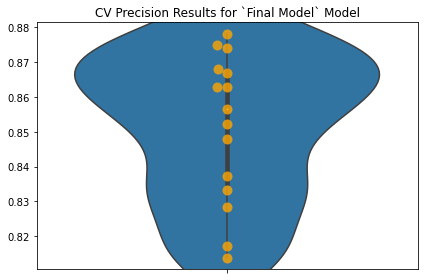

In [1830]:
# validating on test data

final_model_results = ModelWithCV(
                        model=dt_best_model,
                        model_name='Final Model',
                        X=X_test, 
                        y=y_test)

# Plot CV results
fig, ax = plt.subplots()
ax = final_model_results.plot_cv(ax)
plt.tight_layout();


# Print CV results
model_results.print_cv_summary()

In [ ]:
model_results = ModelWithCV(model = rf_best_model, model_name='Best Model - Testing',X=X_train, y=y_train)
model_results.cross_val_dataframe(df_cv_2)

In [1824]:
y_pred_test = dt_best_model.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.51      0.69      0.59      1912
           1       0.86      0.75      0.80      5061

    accuracy                           0.73      6973
   macro avg       0.69      0.72      0.69      6973
weighted avg       0.77      0.73      0.74      6973



In [1860]:
#making new dataframe for bar graph comparing the base and best model
base_model_comp = df_cv_2.loc[(df_cv_2['Model'] == "Base Model") | (df_cv_2['Model'] == "Decision Tree #3 - Best Model")]
base_model_comp = base_model_comp.round(2)
base_model_comp


In [1863]:
import plotly.graph_objects as go

#plotting bar chart
fig = px.bar(base_model_comp, x="Model", y="CV Precision Mean",height=600, text="CV Precision Mean")

#centering title
fig.update_layout(title_text='Model Comparison', title_x=0.5, title_y=0.95, xaxis_type="category",
                 font = dict(size=15),paper_bgcolor="#ffffff")

fig.update_traces(marker_color = "#11ace4", textposition='outside')

fig.update_yaxes(range=[0, 1])

newnames = {'Base Model':'Base', 'Decision Tree - Grid Search': 'Final'}

fig.show()

# Results

The four main feature with the highest feature performance:

- home essentials (dishes and esentials)
- price
- host response rate

Though superhost is among the top features, since we are helping new airbnb hosts optimize their airbnb homes and listings, this is not an insightful metric to talk about as action cannot be made to change this immediately. It is a good feature to be aware of, as the goal of optimizing airbnb listings is to receive high reviews to increase ratings and bookings.


CV Results for `Random Forest #2` model:
            0.80616 ± 0.00505 precision
        


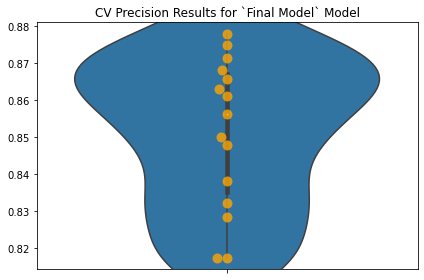

In [1826]:
# validating on test data

final_model_results = ModelWithCV(
                        model=dt_best_model,
                        model_name='Final Model',
                        X=X_test, 
                        y=y_test)

# Plot CV results
fig, ax = plt.subplots()
ax = final_model_results.plot_cv(ax)
plt.tight_layout();


# Print CV results
model_results.print_cv_summary()

In [1832]:
plot_top_15_features(dt_best_model, X_test, 5)

0             Feature
17  0.262678              dishes
7   0.202139               price
1   0.136006   host_is_superhost
0   0.073308  host_response_rate
11  0.068750          essentials
3   0.034622           longitude
2   0.029046            latitude
5   0.020791           bathrooms
42  0.017075            electric
25  0.012532                oven
21  0.011512              washer
23  0.010991             shampoo
22  0.010270             heating
36  0.009714             smoking
45  0.009630          dinnerware
32  0.009059   cleaning_products
18  0.008588                crib
24  0.007815               stove
44  0.007366          beachfront
47  0.006234                open

In [1874]:
tree_features = (dt_best_model.feature_importances_)
tree_features = pd.DataFrame(tree_features)
    
#renaming column
tree_features["Feature"] = X_test.columns.values
    
#sorting the top 15 most important features
top_15_features = tree_features.sort_values(0,ascending=False).head(20)

#renaming feature column
top_15_features.rename(columns={0:"Importance"}, inplace=True)

In [1875]:
top_15_features

Importance             Feature
17    0.262678              dishes
7     0.202139               price
1     0.136006   host_is_superhost
0     0.073308  host_response_rate
11    0.068750          essentials
3     0.034622           longitude
2     0.029046            latitude
5     0.020791           bathrooms
42    0.017075            electric
25    0.012532                oven
21    0.011512              washer
23    0.010991             shampoo
22    0.010270             heating
36    0.009714             smoking
45    0.009630          dinnerware
32    0.009059   cleaning_products
18    0.008588                crib
24    0.007815               stove
44    0.007366          beachfront
47    0.006234                open

In [1876]:
top_15_features['Feature'] = top_15_features['Feature'].astype(str)

In [1877]:
top_15_features_no = top_15_features[top_15_features['Feature'].str.contains("host_is_superhost","host_response_rate") == False]
top_15_features_no.head()

Importance             Feature
17    0.262678              dishes
7     0.202139               price
0     0.073308  host_response_rate
11    0.068750          essentials
3     0.034622           longitude

In [1892]:
top_15_features = top_15_features.replace('host_response_rate',"Host Response Rate")
top_15_features = top_15_features.replace('host_is_superhost',"Superhost")
top_15_features = top_15_features.replace('dishes',"Dishes")
top_15_features = top_15_features.replace('price',"Price")
top_15_features = top_15_features.replace('essentials',"Essentials")

In [1889]:
top_15_features

Importance             Feature
17    0.262678              Dishes
7     0.202139               Price
1     0.136006           Superhost
0     0.073308  Host Response Rate
11    0.068750          essentials
3     0.034622           longitude
2     0.029046            latitude
5     0.020791           bathrooms
42    0.017075            electric
25    0.012532                oven
21    0.011512              washer
23    0.010991             shampoo
22    0.010270             heating
36    0.009714             smoking
45    0.009630          dinnerware
32    0.009059   cleaning_products
18    0.008588                crib
24    0.007815               stove
44    0.007366          beachfront
47    0.006234                open

In [1893]:
#using plotly to plot the top featurescolor=
fig = px.bar(top_15_features.head(5), x="Feature", y="Importance", title = "Top Features" )
fig.update_layout(title_text='Feature Importance', title_x=0.5)
fig.update_traces(marker_color = "#193d99")
fig.show()

## Conclusions

As a result of this analysis, three features with the highest feature importance have been identified as the most important in classifying airbnb ratings in Crete:

- **Price**: Hosts should price their listings competitively and should reconsider nightly rates that are too high
    
- **Home Essentials**: Hosts should make sure their listings are stocked with home essentials for their stay

- **Host Response Rate**: Hosts should respond to all messages and should be timely in their responses

In [1842]:
model_dt_df['price'].sort_values(ascending=False)

12417    20079.0
10354    17221.0
8443     15960.0
18059    11600.0
18068    11600.0
          ...   
21198       10.0
17970       10.0
15367       10.0
9566        10.0
4178        10.0
Name: price, Length: 23241, dtype: float64

## Next Steps

From the initial modeling research, it is clear that the number of ratings and overall ratings play a large role in predicting whether an airbnb listing will be highly rated. To gain a more comprehensive understanding of why it would be beneficial to do further reserach into this to determine what other features are important in prediticting prices.

In addition, it would be beneficial to examine more airbnb data to improve on the class imbalance that was present and corrected by adjusting the weight of the target variables.